# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
# Import supplementary visualizations code visuals.py
import visuals as vs
import seaborn as sb

# Pretty display for notebooks
%matplotlib inline

In [2]:
# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
display(data.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [5]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [29,215,343]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)


Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,43088,2100,2609,1200,1107,823
1,2806,10765,15538,1374,5828,2388
2,1689,6964,26316,1456,15469,37


A really nice visualization was suggested in a feedback from the Udacity grader, a so called Radar plot. We can easely see the contribution of each type of products based on the relative number of each feature.    

C:\Users\Boris\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


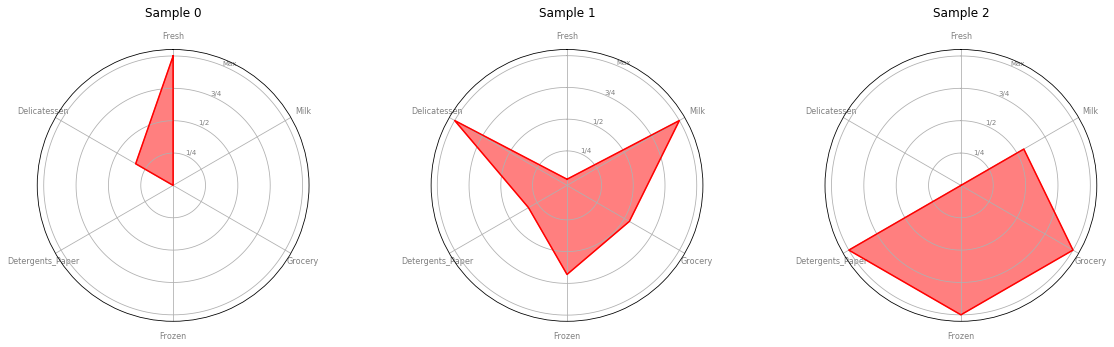

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = np.round(samples, 1)
index  = df.index[:]
categories = list(df)
df = scaler.fit_transform(df)*100


N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(20, 5))
def Radar(index, title, color):
    ax = plt.subplot(1, 3, index+1, polar=True)
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color ='grey', size = 8)
    plt.yticks((25, 50, 75, 100), ("1/4", "1/2", "3/4", "Max"), color = "grey", size = 7)
    values = df[index]
    values = np.append(values, values[:1])
    ax.plot(angles, values, color = color)
    ax.fill(angles, values, color=color, alpha=0.5)
    plt.title('Sample {}'.format(title), y= 1.1)

for i, n in enumerate(index):
    Radar(index=i, title=n, color='r')

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Frozen 3071
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
* I believe that the first customer can be a market where mostly people can buy fresh products such as vegitables and fruits. The annual spending on fresh products 3.6 times more than the avarage value.
* The second client can be a restaurant. They mainly focus on milk and grocery products and spend on these products almost twice as much as the avarage cost on these segments. However, on fresh products they spend about 4 time less than the average price. They spend signinficant amount on paper and detergent, I think, to clean their facilities. They also buy the delicatessen more than an average client.
* The third client can be a store where they mainly sell grocery and milk prodcuts, they also buy cleaning produts, but they spend very little on delicatessen  

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Detergents_Paper'], axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'], test_size=0.25, random_state=42)

for depth in [1,2,3,4,5]:
    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(max_depth=depth)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    # TODO: Report the score of the prediction using the testing set
    score_r2 = r2_score(y_test, y_pred)
    score_msq = mean_squared_error(y_test, y_pred) 
    print('For max depth {} R2 score {:0.4f}, mean squared error {:1.0f}'.format(depth, score_r2, score_msq))


For max depth 1 R2 score -0.0000, mean squared error 9863371
For max depth 2 R2 score 0.4747, mean squared error 5180907
For max depth 3 R2 score 0.5801, mean squared error 4141521
For max depth 4 R2 score 0.5786, mean squared error 4156656
For max depth 5 R2 score 0.4767, mean squared error 5161405


In addition we can plot a bar chart of feature_importance_ and check what are the most important features in predicting Detergents_Paper.  

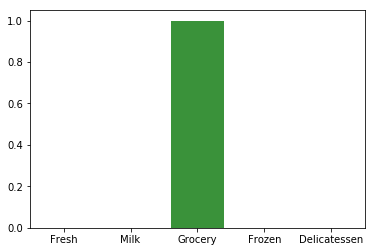

In [8]:
import seaborn as sns
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

sns.barplot(X_train.columns, regressor.feature_importances_)

We can see that the most important feature is Grocery

In [9]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data_f = data.drop(['Fresh'], axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(new_data_f, data['Fresh'], test_size=0.25, random_state=42)

for depth in [1,2,3,4,5]:
    # TODO: Create a decision tree regressor and fit it to the training set
    regressor_f = DecisionTreeRegressor(max_depth=depth)
    regressor_f.fit(X_train_f, y_train_f)
    y_pred_f = regressor_f.predict(X_test_f)

    # TODO: Report the score of the prediction using the testing set
    score_r2_f = r2_score(y_test_f, y_pred_f)
    score_msq_f = mean_squared_error(y_test_f, y_pred_f) 
    print('For max depth {} R2 score {:0.2f}, mean squared error {:1.0f}'.format(depth, score_r2_f, score_msq_f))

For max depth 1 R2 score 0.11, mean squared error 211420749
For max depth 2 R2 score -0.16, mean squared error 277241826
For max depth 3 R2 score -0.08, mean squared error 257551700
For max depth 4 R2 score -0.19, mean squared error 283806662
For max depth 5 R2 score -0.14, mean squared error 270287694


### Question 2

* Which feature did you attempt to predict? 
 
* What was the reported prediction score?

* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
* Which feature did you attempt to predict? 
`I tried to preidct two features Detergents_Paper and Fresh`
* What was the reported prediction score? 
`I tried to find the best max_depth parameter for both features. For Detergents_Paper R2 score is 0.5801 and it corresponds to the maximum value when max_depth is 3. The second parameter mean_squared_error was also defined and it reaches the minimum value 4141521 which also confirms that max_depth=3 is the best parameter among considered. In addition, the prediction r2 score 0.5801 is moderate because r2 score can take values from 0 to 1 and 1 corresponds to the best predction. 
For the Fresh parameter r2 score reaches its maximum value 0.11 for max_depth = 1 and minimum value of mean_squared_error = 211420749. The values of r2 score for other max_depth parameters are negative and it means that it is hard to predict this feature. Also, when r2 score is close to 0, such as in our case it is 0.11, we can say that we cannot rely on this preidtion.`
* Is this feature necessary for identifying customers' spending habits?
`Because Detergents_Paper can be predicted from other features this feature is not necessary for identifying customers' spending habits, but the Fresh feature needs to be considered for this purpose `

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

C:\Users\Boris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


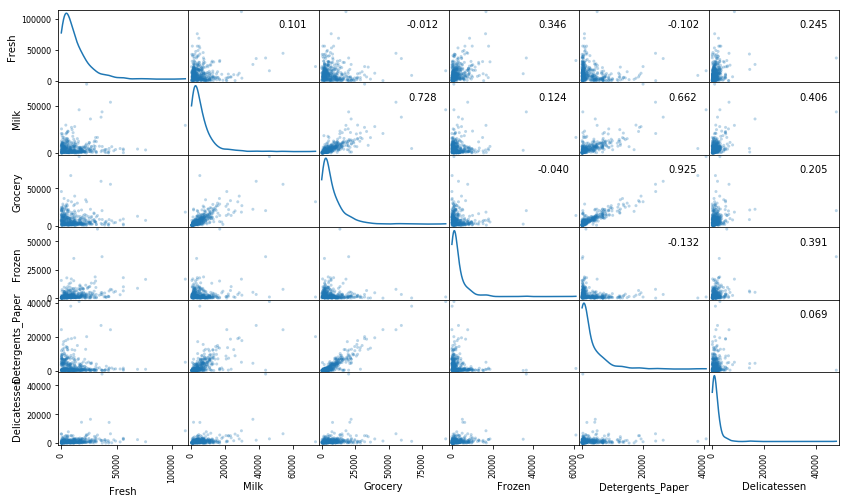

In [10]:
# Produce a scatter matrix for each pair of features in the data
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

#recommended by the Udacity grader:

corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

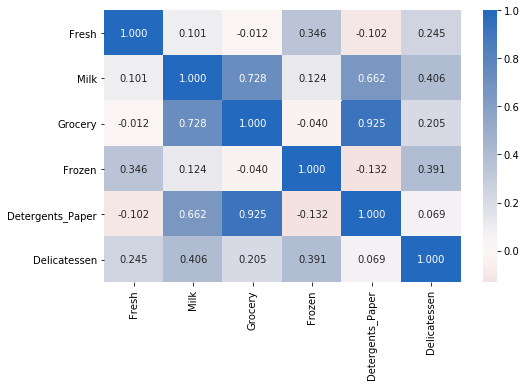

In [11]:
numeric_vars = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(data[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**
### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well. `We can see that the distributions of each feature are right skewed with long tails to the right. The peaks, i.e. the modes, of the distributions are closer to 0 and we can obviously see significant number of outliers on each distribution. In addition, we can say that we cannot categorize these distributions as normal. Below we will use the logarithmic transformation which will allow us which will allow us to transform our data to normal-like distribution.`
* Are there any pairs of features which exhibit some degree of correlation? `The highest degree of correlation is observed for the Groccery and Detergents_Paper pair and reaches 0.925 value and can be classified as a strong correlation. Another strong corelated pairs are Groccery and Milk with correlation coefficietn 0.728. The moderate correlated pairs are Delicatessen and Frozen, Delicatessen and Milk, Detergents_Paper and Milk. In addition, we can name pairs with weak correlation such as Detergents_Paper and Delicatessen, Groccery and Delicatessen. Finally, one can note that we can observe pairs with negative weak correlation such as Detergents_Paper, Frozen and Groccery and Frozen`
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict?  `We tried to predict Detergents_Paper with respect to other feature. We found that R2 score for this prediction is 0.5786. At the same time correlation of Detergents_Paper with Groccery and Milk are strong and moderate respectively. Correlation with other parameters are either weak positive or weak negative. Probably, this is why we obtain quite moderate prediction for Detergents_Paper`
* How is the data for those features distributed? `As it was mentioned above for all features the distributions are skewed right. However, we can obviously see the relationships between the correlated pairs. However, it is hard to note relationships on the weak correlated pairs. `


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\Users\Boris\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


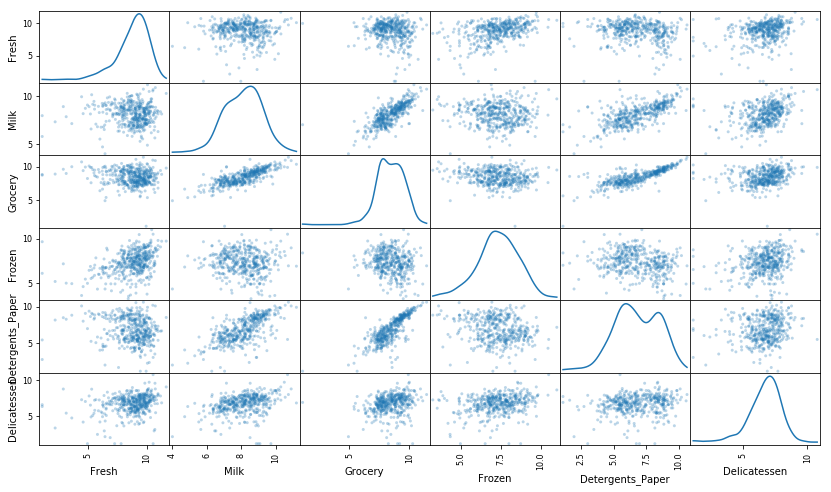

In [12]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [13]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.671000,7.649693,7.866722,7.090077,7.009409,6.712956
1,7.939515,9.284055,9.651044,7.225481,8.670429,7.778211
2,7.431892,8.848509,10.177932,7.283448,9.646593,3.610918


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [14]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():

    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65, 66, 75, 128, 154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


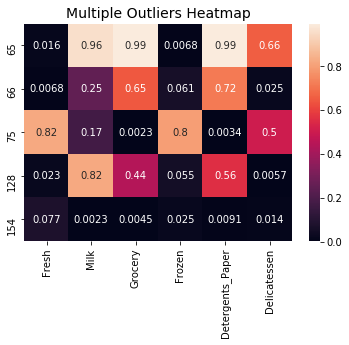

In [15]:
# Heatmap using percentiles to display outlier data
import matplotlib.pyplot as plt
import seaborn as sns
percentiles = data.rank(pct=True)
percentiles = percentiles.iloc[outliers]
plt.title('Multiple Outliers Heatmap', fontsize=14)
heat = sns.heatmap(percentiles, annot=True)
display(heat)

We can see that the features on the heatmap were ranked almost 0 in at least 2 product types based on the procentile. Moreover, the worst case is for the client 154, where all 6 product types are outliers.   

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
* Are there any data points considered outliers for more than one feature based on the definition above? ` Yes, points 65, 66, 75, 128 and 154 are considered outliers in more than one point. `
* Should these data points be removed from the dataset? `Yes, it is better to remove these points. `
* If any data points were added to the `outliers` list to be removed, explain why. `These points need to be removed because, for example, if we initialize our cluster center near the outliers it might happen that K-mean can find its local minimum at outlier. `

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

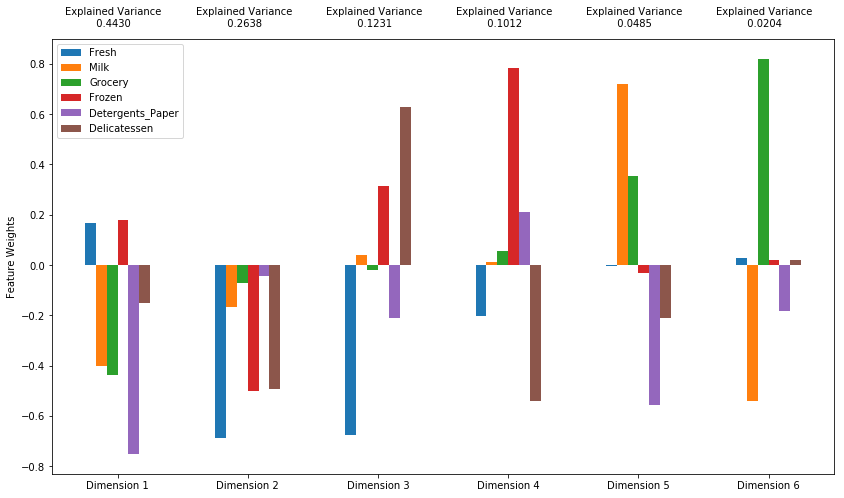

In [16]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [17]:
pca.components_

array([[ 0.16746374, -0.40143866, -0.43811142,  0.17820975, -0.75142613,
        -0.14987105],
       [-0.68593522, -0.16722783, -0.07072902, -0.50054207, -0.04244398,
        -0.49414702],
       [-0.67738927,  0.04020501, -0.01953317,  0.31504299, -0.21170161,
         0.62855082],
       [-0.204293  ,  0.01281068,  0.05567564,  0.78544905,  0.20961368,
        -0.54233972],
       [-0.00261356,  0.71923846,  0.3553861 , -0.0330861 , -0.55815441,
        -0.20918629],
       [ 0.02915623, -0.54018269,  0.82053348,  0.02054106, -0.18238824,
         0.01974794]])

In [18]:
pca.explained_variance_ratio_

array([ 0.44302505,  0.26379218,  0.1230638 ,  0.10120908,  0.04850196,
        0.02040793])

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
* How much variance in the data is explained* **in total** *by the first and second principal component? `70.68%`
* How much variance in the data is explained by the first four principal components? `93.11%`
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending. 
`Each bar in each dimension is the normalized cordinate of the dimension in the old cordinate system. It means that the sum of squares of these vectors is 1. Moreover, the higher the value of these unit vector the more information it collects from the corresponding feature. 
So, for instance:`

1. The Detergents_paper is well determine in the first Dimention, then it is Groccery and Detergents_Paper.  At the same time this dimension also contains information about how few these productes are purchsed by other clients due to the high variance. So, this is so called spread of the data. In addition, other components of this principal compoent such as Fresh, Frozen and Delicatessen are quite low, less than 0.2 and we can think that thier contribution is signinficantly small. So, this component can be assosiated with retail spending. 

2. For the second dimention we can say that this dimension represents mainly variaty of customers who make mainly purchases of Fresh, Frozen and Delicatessen or those who do just a litle purchases of these products. Milk, Grocery and Detergents_Paper components of these dimenstion are significantly small. This component can be assosiated with the restaurant. 

3. Fresh, Frozen and Delicatessen are the main contributors to the Dimension 3. There is some contribution of Detergent paper as well. However, the Expained variance os 3.6 times lower compare to the Explained Variance of the  first Dimenstion. It means it contains 3.6 times less information than the first Dimension. This component can be assosiated with the restaurant. 

4. Frozen is the main contributor for the 4th dimension, than Delicatessen abd Fresh and Detergents_Paper. Again, the Expained variance is even smaller here than in Dimension 3. This component can be assosiated with the retail. 

`We can note that first two Dimensions contain all 6 companetes with signinficant feature weights and high variance. These 2 dimension might be good enough to consider of our clustering analysis. `

`The positive or negative values of the weighted feature is defined by the direction of the new coridnate system in the old one. The commulative variance shows the amount of information each dimention gain after applying PCA in relative values. So, the some of all comulative variance values is 1. We can see that 93.11% of information is contained in the first 4 dimensions`

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [19]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 6), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.568409,-1.084954,-1.404356,-0.578413,-0.673760,-0.215723
1,-2.710498,-0.275516,0.837363,-0.023314,-0.011424,0.006746
2,-2.950126,2.097058,-1.654331,2.614381,0.188863,0.400404


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [20]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [21]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.5684,-1.0850
1,-2.7105,-0.2755
2,-2.9501,2.0971


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

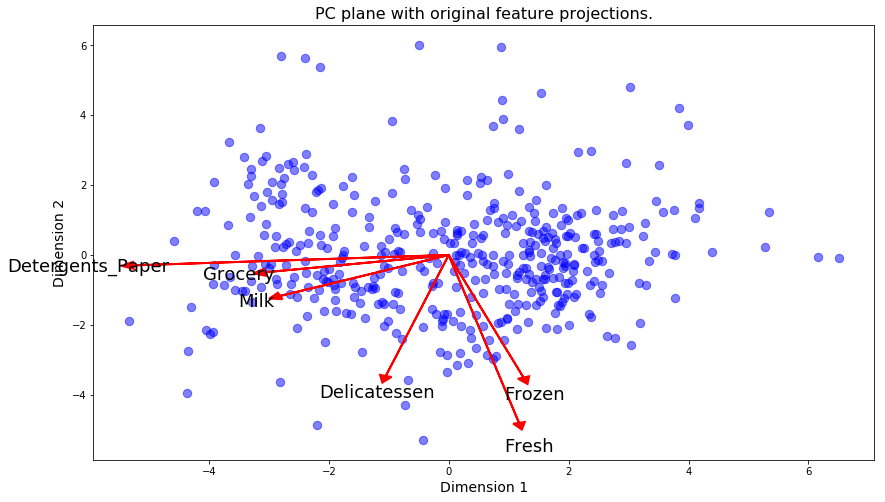

In [22]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?
`Delicatessen, Fresh and Frozen are most stronly associated with the first component and Detergents_Paper, Grocery and Milk are associated with the second compenent. Yes, these observations agree with the pca_results plot which was obtained earlier.`

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm?
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why? 

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
* What are the advantages to using a K-Means clustering algorithm?
`This algorithm is computationally fast with large number of features if k is small enough. K-means is more scalable. However, K-Means straight boundaries (hard clustering)  `
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
`GMM you get much more structural information, thus you can measure how wide each cluster is, since it works on probabilities (soft clustering). However, GMM slower since it has to incorporate information about the distributions of the data, thus it has to deal with the co-variance, mean, variance, and prior probabilities of the data, and also has to assign probabilities to belonging to each clusters.` 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why? `We don't see on the plot a clear seperation between clusters. In addition, the data set on the plot looks alongated along Dimension 1, but it might be an affect of the scaling. So, because GMM uses soft-clustering, which assumes that each point belongs to all clusters, but ranked differently in each cluster,  and GMM is more suitable for different shapes, such as alongated shape along Dimension 1, in this case, I beleave that GMM would be a good choice for our problem.   `

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [23]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
# TODO: Apply your clustering algorithm of choice to the reduced data 
gmm = GaussianMixture(n_components=3, covariance_type= 'diag')
clusterer = gmm.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = gmm.predict(reduced_data)

# TODO: Find the cluster centers
#centers =  # I did not find an attribute which shows the center of the cluster for GMM. 

# TODO: Predict the cluster for each transformed sample data point
sample_preds = gmm.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
score


0.32631733470085295

In [24]:
from sklearn.cluster import KMeans

# TODO: Apply your clustering algorithm of choice to the reduced data 
kmeans = KMeans(n_clusters=3)
clusterer_ = kmeans.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds_kmeans = kmeans.predict(reduced_data)

# TODO: Find the cluster centers
centers = kmeans.cluster_centers_ 

# TODO: Predict the cluster for each transformed sample data point
sample_preds_kmeans = kmeans.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds_kmeans)
score


0.39641738719668551

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
`I clustered the data set using two methods: GMM and Kmeans`

* Report the silhouette score for several cluster numbers you tried. 

`For GMM ` 

|     clusert #  | silhouette score  | 
| :------------: | :---------------: |  
|       2        |     0.423         | 
|       3        |     0.325         |
|       4        |     0.341         |
|       5        |     0.315         |

`For Kmeans`

|     clusert #  | silhouette score  | 
| :------------: | :---------------: |  
|       2        |     0.426         | 
|       3        |     0.397         |
|       4        |     0.332         |
|       5        |     0.315         |

* Of these, which number of clusters has the best silhouette score?
`As we know the higher the silhouette score the better result. We can see that the silhouette scores are pretty much similar for cluster # 2 and have the highest numbers 0.423 and 0.426 for GMM and KMeans respectively. So, we can see that Kmeans performs a little bit better than GMM in this case.`

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

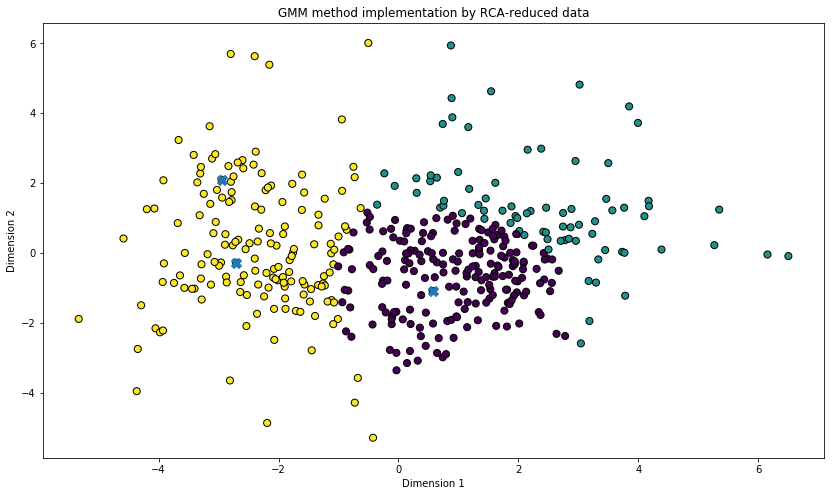

In [25]:
# Display the results of the clustering from implementation of GMM

plt.figure(figsize=(14,8))
plt.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], c=preds, edgecolor='black', s=50,   cmap=plt.get_cmap('viridis'))
plt.scatter(pca_samples[:,0], pca_samples[:,1], marker='X', s=100) #, c=sample_preds, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('inferno')) 
plt.title('GMM method implementation by RCA-reduced data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

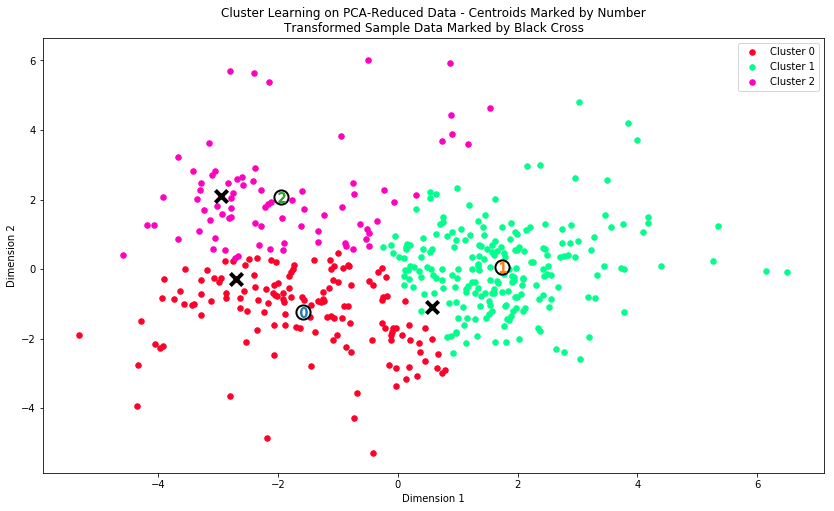

In [26]:
# Display the results of the clustering from implementation of Kmeans
vs.cluster_results(reduced_data, preds_kmeans, centers, pca_samples)

In addition, plots for GMM and Kmeans with 2 clusters each have been considered. The screen shots of these plots are presented here:
1. GMM:

<img src="GMM k2.jpg"  style="width:600px;height:400px;">

2. Kmeans:

<img src="KMEANS k2.jpg"  style="width:600px;height:400px;">

`We can see that both GMM and KMeans for k=2 performs well and have almost similar clusters and the mean silhouette coefficients. For k=3, visually and according to the mean silhouette coefficients, KMeans algorithm works better. In addition, even though KMeans with k=2 has higher value of the mean silhouette coefficient 0.426 than for k=3, where the mean silhouette coefficient is 0.397, I would choose KMeans with k=3 because visually, the data set clustered better with KMeans k=3. `

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [27]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.columns)
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,11588.0,7881.0,10318.0,2137.0,3105.0,1897.0
Segment 1,8290.0,1672.0,2197.0,2016.0,242.0,607.0
Segment 2,1118.0,5242.0,9582.0,380.0,3554.0,389.0


C:\Users\Boris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'cluster centroids visualization')

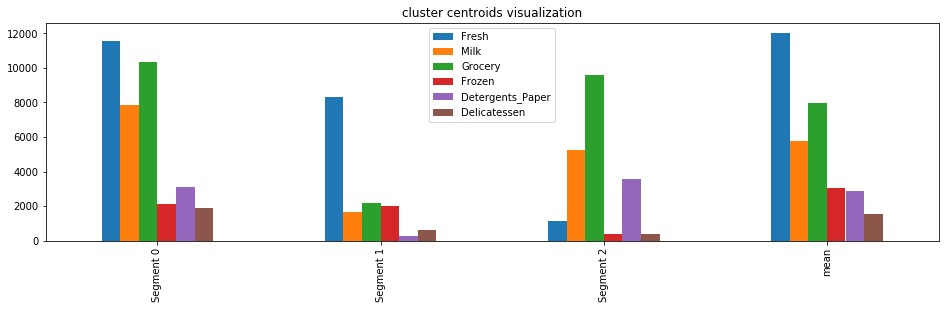

In [28]:
true_centers = true_centers.append(data.describe().ix['mean'])
true_centers.plot(kind = 'bar', figsize = (16, 4))
plt.title('cluster centroids visualization')

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**
`I believe that the Segment 0 can be a market where they mainly have sell fresh vegetables and friuts. They less focus on selling  Dairy, Grocery and other types of the products.
The Segment 1 can be a retail/grocery store where they sell all product types. They purchase all products at the wholesale with the  price close to the mean annual values.
The Segment 2 I would classify as a fast food restaurant. They buy mainly  Grocery products and Detergents_Paper which cost more than the mean values. I can assume that they make hamburgers or hotdogs and they need Detergents_Paper to clean tables, kitchen and other facilities. `


### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [29]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 2
Sample point 2 predicted to be in Cluster 2


In [30]:
#consider the distance between the samples to each cluster centroid 
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)
    print('The distance between sample point {} and center of cluster {}:'.format(i, pred))
    print((samples.iloc[i] - true_centers.iloc[pred]))
true_centers

Sample point 0 predicted to be in Cluster 0
The distance between sample point 0 and center of cluster 0:
Fresh               31500.0
Milk                -5781.0
Grocery             -7709.0
Frozen               -937.0
Detergents_Paper    -1998.0
Delicatessen        -1074.0
dtype: float64
Sample point 1 predicted to be in Cluster 2
The distance between sample point 1 and center of cluster 2:
Fresh               1688.0
Milk                5523.0
Grocery             5956.0
Frozen               994.0
Detergents_Paper    2274.0
Delicatessen        1999.0
dtype: float64
Sample point 2 predicted to be in Cluster 2
The distance between sample point 2 and center of cluster 2:
Fresh                 571.0
Milk                 1722.0
Grocery             16734.0
Frozen               1076.0
Detergents_Paper    11915.0
Delicatessen         -352.0
dtype: float64


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,11588.000000,7881.000000,10318.000000,2137.000000,3105.000000,1897.000000
Segment 1,8290.000000,1672.000000,2197.000000,2016.000000,242.000000,607.000000
Segment 2,1118.000000,5242.000000,9582.000000,380.000000,3554.000000,389.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455


**Answer:**

1. The sample 0 I classified as Market; however, the sample point 0 predicted to be in Cluster 1. The cluster 1 was classified as the retail/grocery store. In cluster 1 they purchase all products at the wholesale with the  price close to the mean annual values.  However, in the sample 0 they spent significant amount on Fresh, which is much higher than the mean value and from the corresponding component of the cluster centroid. 

2. I classified the sample 1 correctlty which belongs to cluster 1. 

3. I classified the sample 2 as the store. It has more purchases of Grocery and Detergent paper, much higher than the mean value. However, the system classfied it as the Segment 0, which is the market.   

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
`I believe that restaurants have very limited space and they probably would expect delivery 5 days a weak. I think that retail stores have more space and they might be ok with the delivery 3 days per week. So, to check if it is valid idea we can perform the A/B test. Ideally, we need to run this test on new clients to avoid the bias influence. However, we will consider this test on the existed clients and those who run restaurants and have limited space.`

`So, we need to split our restaurant clients into two groups. The first group will be a control group and we will continue deliver them products 5 days per week and the second group, which is a test group we will delivery them 3 times per weel. By the end of the certain period we will conduct the survey about the satisfaction. The satisfaction parameter will be our experimental variable. In addition, we need to run our test seperatly on different client segments.`

`Let p_3day - satisfaction rate  when delivery is 3 days per week and p_5days - satisfaction when delivery is 5 days per week. So, our null and alternative hypotheses are 
    H0: p_3days-p_5days eq 0 
    H1: p_3days - p_5days neq 1
    alpha=0.05`

In [31]:
AB_test= pd.DataFrame(columns=['Group','Satisfuction', 'Cluster'])
AB_test['Cluster']=preds
# We're interesting in the cluster 2 which we classified as Restaurant

AB_test = AB_test.query('Cluster == 2')
AB_test.Group = np.random.randint(0, 2, size=AB_test.shape[0]) # 0 is the control group and 1 is test group
#let's generate satisfaction for the control group
AB_test.loc[AB_test.Group==0, 'Satisfuction'] = np.random.binomial(1, 0.45, size=AB_test[AB_test.Group==0].shape[0]) 
#let's generate satisfaction for the test group
AB_test.loc[AB_test.Group==1, 'Satisfuction'] = np.random.binomial(1, 0.53, size=AB_test[AB_test.Group==1].shape[0])
AB_test.head()

,Group,Satisfuction,Cluster
0,1,1,2
1,0,1,2
2,0,0,2
5,1,0,2
6,1,1,2


In [32]:
p_diffs = []
df2=AB_test.query('Group == 0')
df1=AB_test.query('Group == 1')
for i in range(200000):
    new_3days = df2.sample(40, replace = True)
    old_5days= df1.sample(40, replace = True)
    p_new = new_3days.Satisfuction.mean()
    p_old = old_5days.Satisfuction.mean()    
    p_diffs.append(p_new-p_old)
    if i % 10000 == 0: # check for a running loop
        print(i)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000


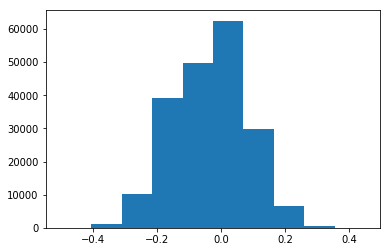

In [33]:
plt.hist(p_diffs);

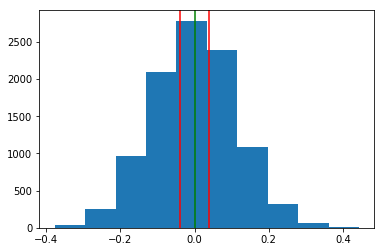

In [34]:
p_diff_data = AB_test.query('Group == 1').Satisfuction.mean() - \
AB_test.query('Group == 0').Satisfuction.mean()
p_null = 0
null_vals = np.random.normal(p_null, np.std(p_diffs), 10000)

plt.hist(null_vals);
plt.axvline(p_null, color = 'green');
plt.axvline(p_diff_data, color = 'red');
plt.axvline(p_null + (p_null - p_diff_data), color = 'red');

What proportion of the p_diffs are greater than the actual difference observed in AB_test?

In [35]:
(null_vals < p_diff_data).mean() + (null_vals > (p_null + (p_null - p_diff_data))).mean()

1.2645

*The P-value was computed. It is a probability of obtaining our data from the Null hypothysis given that H0 is true. Because the p-values is significantly large and, therefore, it is larger than  alpha=0.05  we have evidance that with type I error rate 5% that a 3 day delivery option is not better than 5 days delivery option. So, we don't see that it is statistically signinficant.*

**To conclude the A/B testing, I can say that the data set is quite small. The Satisfaction was generated by using Binomial distribution and not the real data. So, I would not expect in this case any miningful results.**

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** `We can use clusters as the target values. However, I am not sure why do we need to use a supervise learner if we can plug in the estimated product spending of our new client in our exising KMeans model, using kmeans.predict() and it will give us a cluster number in which our new client falls in.`

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

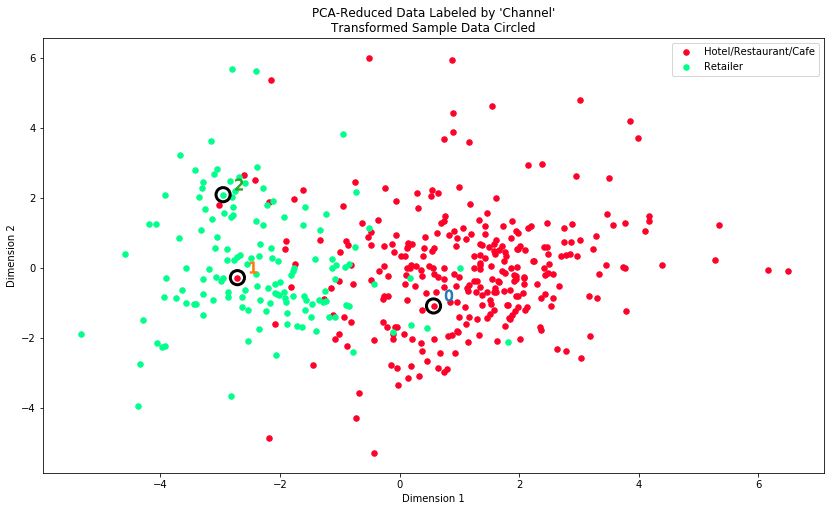

In [36]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
`I chose kmeans algorithm with k=3. It produces one additional cluster compare to the plot above. If we combine cluster 1 and 2 it would be pretty similar to the classifcation based on the Channel. `
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? `I would say no because we can see that the original classification gives us some ovelapping from Retail in HoReCa and from HoReCa in Retail `
* Would you consider these classifications as consistent with your previous definition of the customer segments? `I believe that the only segment which was correctly identified was 1 - grocery store which can be considered as Retail`

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.